In [2]:
from docscorer.configuration import ScorerConfiguration
from docscorer.docscorer import DocumentScorer
import json
import pandas as pd
config = ScorerConfiguration()
scorer = DocumentScorer(config)

In [3]:
path = "/mnt/d/Prompsit/WDS/aarepo_github/datos/it_hplt.jsonl"
documents = []
with open(path, "r", encoding="utf8") as a:
    for document in a:
        documents.append(json.loads(document))

In [ ]:
results = []
for document in documents:
    result = scorer.score_document(ref_lang="spa", ref_script="Latn", lang_segments=document["langs"], document_text=document["text"], doc_id="0", raw_score=False)
    results.append((document["id"], result, document["text"]))

In [4]:
df = pd.DataFrame(columns=["id", "results", "text", "language"])
for document in documents:
    result = scorer.score_document(ref_lang="ita", ref_script="Latn", lang_segments=["ita_latn" if x == "it" else x for x in document["langs"]], document_text=document["text"], doc_id=document["id"], raw_score=False)
    df.loc[df.shape[0]] = [document["id"], result, document["text"], result[2]]

Doc_name: '289336' - Only too short segments have been found on the target language
Doc_name: '74007654' - Only too short segments have been found on the target language
Doc_name: '71016951' - Only too short segments have been found on the target language
Doc_name: '22613217' - Only too short segments have been found on the target language
Doc_name: '8821911' - Only too short segments have been found on the target language
Doc_name: '49690261' - Only too short segments have been found on the target language
Doc_name: '82670661' - Only too short segments have been found on the target language
Doc_name: '68100222' - Only too short segments have been found on the target language
Doc_name: '77029439' - Only too short segments have been found on the target language
Doc_name: '43513658' - Only too short segments have been found on the target language
Doc_name: '31281010' - Only too short segments have been found on the target language
Doc_name: '14019758' - Only too short segments have been 

In [5]:
x = df.sample(1).iloc[0]
print(x.results)
print(x.text)

[0.6342230517087879, 0.7536697113125247, 0.94, 1.0, 1.0, 1.0, 0.96, 0.9, 0.2, 1.0, 1.0]
RASFF, salmonella in salame dall’Italia ritirato dal mercato europeo | Verde Azzurro – Notizie
Home
Feste e Sagre
Arte e Cultura
Politica
Eventi
Farmacista
Archivi
Lavora con Noi
Contatti
Home
Lucca
Altopascio
Capannori
Montecarlo
Porcari
Bagni di Lucca
Barga
Borgo a Mozzano
Castelnuovo di G.
Video
Piazza al Serchio
Santo del Giorno
Cura e Natura
Cibi e Sapori
Sport
Amici Animali
News dal Mondo
Economia
Garfagnana
Versilia
Accadde Oggi
Lavoro
Arte e Cultura
Erbe Officinali
Breaking news
GRAVE INCIDENTE A BORGO A MOZZANO, INVESTITO UN PEDONE
Lucca tra i primi centri italiani per la brachiterapia prostatica
Anziano muore sotto il trattore ribaltato
RASFF, salmonella in salame dall’Italia ritirato dal mercato europeo
338 Visto maggio 28, 2017 Bagni di Lucca, Barga, Cura e Natura, Primo Piano Valle del Serchio, Ultimi Articoli Valle del Serchio Verde Azzurro 6
RASFF, salmonella in salame dall’Italia rit

In [1]:
df.sample(10)

NameError: name 'df' is not defined

In [6]:
df.shape

(50000, 4)

In [17]:
x= df.results.to_list()

[0.0, -3.9646155149170843, 0.98, -4.65, 0.94, 1.0, 0.97, 1.0, 0.3, 1.0, 1.0]

In [6]:
df["score_wds"] = df['results'].apply(lambda x: x[1] if isinstance(x, list) else None)

In [7]:
with open("/mnt/d/Prompsit/WDS/aarepo_github/datos/multiplied_exponent_3.txt", "a+", encoding="utf8") as a:
    for _, line in df.iterrows():
        e = line["results"]
        a.write(f"{e[0]}\t{e[1]}\n")

In [22]:
for x in df.iterrows():
    print (x)
    break

(0, id                                                     9568232
results      [0.8021550377550715, 0.8155990882290454, 0.96,...
text         Blog di Cinese Facile - Cinese Facile 2.0 di L...
language                                                  0.96
score_wds                                             0.815599
Name: 0, dtype: object)


In [14]:
df["results"].sample(10)

12585    [0.7191546175846028, 0.730929538613273, 0.94, ...
5808     [0.4747229786917153, 0.4264604779629531, 0.86,...
12429    [0.6749717162895132, 0.6649051029849461, 0.88,...
44494    [0.8160090434539742, 0.8275560028352816, 0.97,...
40796    [0.964352142874529, 0.9581646915842037, 0.98, ...
33992    [0.6508841955803522, 0.6798642202517802, 0.9, ...
12336    [0.5154179179084104, 0.5323739616822231, 0.65,...
32560    [0.5765208066374805, 0.5912930548163569, 0.87,...
42320    [0.30327067621198833, 0.3051720245327732, 0.45...
29807    [0.7211691930917, 0.7065742271416149, 0.92, 1....
Name: results, dtype: object

In [30]:
selec = df[df.score_wds<0].iloc[0]
print(selec.id)

6742417


In [35]:
i = [x for x in documents if x["id"] ==6742417][0]

In [37]:
i.keys()

dict_keys(['id', 'document_lang', 'scores', 'langs', 'text', 'url', 'collection'])

In [36]:
print(i["text"])

Filamenti a disposizione oggi - Filamento 3D | Stampa 3D | I3DP
Crea sito
Ricerca per:
Settembre 30, 2022
Trending Now
Stampa 3d | Home
News
News
Stampa 3D
Stampa 3D
Stampante 3D: Recensioni delle migliori!
Upgrade
Guide
Guide
Guide Software
Problemi comuni
Post Produzione
Software stampa 3D
Slicer
Modellazione 3D
Dialogo
Filamento 3D
Filamento 3D
Recensioni Filamento 3D
PLA
ABS
PETG
Speciali
Tecnologia
Recensioni Tech
Progetti
Negozio
Negozio Stampanti 3D
RICAMBI
Componenti meccanici
Guide Lineari
Cuscinetti
Giunti
Madrevite
Pulegge e cinghie
Raccordi pneumatici
Viti dadi rondelle
Strumenti meccanici
Lastre e Profilati
Lastre
Profilati in alluminio
Accessori per Profilati
Elettronica
Motore passo passo
Driver
Scheda di controllo
Relè ed Interruttori
Alimentatore
Schermi
Ventola
Schede di memoria SD
Materiale elettrico – Negozio I3DP
Cavi
Raccogli cavi
Strumenti elettricista
Gruppo estrusore – Negozio I3DP
Estrusore
Hotend
Gola
Nozzle
Termistore
Cartuccia riscaldante
Puleggia dentata
H

In [41]:
features = scorer._extract_features(document_text=i["text"])
scorer._compute_scores(ref_lang="ita_latn", lang_segments=["ita_latn" if x == "it" else x for x in i["langs"]], document_text=i["text"], ref_script="latn", doc_id=i["id"], features=features)


ScoreResult(language=0.8694835027147432, punctuation=0.9772151898734177, singular_chars=1.0, numbers=0.9825242718446602, repeated=0.9615384615384616, url=-4.290630665630665, informativeness=1.0, long_segments=(1.0, 0.6797101449275362))

In [51]:
score(scorer, ref_language="ita_latn", document=i["text"], word_chars=features["word_chars"])

-4.290630665630665

In [ ]:
score(self, ref_language: str, document: str, word_chars: List[int]) -> float

In [99]:
from enum import Enum
class URLThreshold(Enum):
    LOW = 3
    MID = 5
    HIGH = 10

from typing import Any, List
def get_threshold(
    table: dict[str, Any], language: str, default_key: str = "standard"
) -> Any:
    """Fetch a language-specific threshold, falling back to `default_key`."""
    try:
        return table.get(language, table[default_key])
    except KeyError:
        raise KeyError(
            f"Neither '{language}' nor default '{default_key}' found in {table}."
        ) from None


def scale_value(
    value: float,
    min_value: float,
    max_value: float,
    min_score: float,
    max_score: float,
) -> float:
    """Scale a value linearly into a score range."""
    if min_value == max_value:
        return 0.0

    ratio = (value - min_value) / (max_value - min_value)
    score = ratio * (max_score - min_score) + min_score
    return score

MAX_SCORE = 1.0
MIN_SCORE = 0.0

def __init__(self, config: ScorerConfiguration):
    self.config = config

def score(self, ref_language: str, document: str, word_chars: List[int]) -> float:
    menu_length = get_threshold(self.config.MENUS_AVERAGE_LENGTH, ref_language)

    # Normalization factor based on menu length
    reference_text_length = menu_length * 100
    ratio_respect_reference = sum(word_chars) / reference_text_length or 0.1

    url_count = max(document.count("www"), document.count("http"))
    url_quantity = url_count / ratio_respect_reference
    
    if url_quantity <= URLThreshold.LOW.value:
        return self.MAX_SCORE
    if url_quantity >= URLThreshold.HIGH.value:
        return self.MIN_SCORE
    return scale_value(url_quantity, URLThreshold.LOW.value, URLThreshold.HIGH.value, self.MAX_SCORE, self.MIN_SCORE)

In [100]:
score(scorer, ref_language="ita_latn", document=i["text"], word_chars=features["word_chars"])

0.7810707810707811

In [7]:
df[df.score_wds == df.score_wds.max()]

,id,results,text,language,score_wds
48967,21220087,"[0.999719642544244, 0.999719642544244, 1.0, 1....",Interessi cessione del quinto dello stipendio ...,1.0,0.99972


In [21]:
x = df.iloc[0]["results"]
x

[0.7096956857525212,
 0.8155990882290454,
 0.96,
 1.0,
 1.0,
 1.0,
 0.92,
 0.98,
 0.4,
 1.0,
 1.0]

In [19]:
df_mik = pd.DataFrame(columns=["WDS_score", "base_score", "pen_score1", "pen_score2", "pen_score3", "pen_score4", "pen_score5", "pen_score6"])

In [23]:
for _, line in df.iterrows():
    x = line["results"]
    df_mik.loc[df_mik.shape[0]] = [x[1], x[2]*0.8+x[9]/10+x[8]/10, x[3], x[4], x[5], x[6], x[7], x[10]]

In [30]:
df_mik.sample(10)

,WDS_score,base_score,pen_score1,pen_score2,pen_score3,pen_score4,pen_score5,pen_score6
8268,0.659269,0.778,1.0,1.00,1.00,0.92,0.93,1.00
32433,0.930731,0.946,1.0,0.98,1.00,1.00,1.00,1.00
42260,0.000000,0.752,0.0,0.57,0.64,0.49,1.00,0.87
9240,0.400767,0.862,1.0,0.91,1.00,0.80,0.60,1.00
21990,0.471318,0.682,1.0,1.00,1.00,0.94,0.73,1.00
12612,0.664157,0.890,1.0,0.84,1.00,0.89,0.97,1.00
39917,0.643799,0.674,1.0,0.96,1.00,1.00,1.00,1.00
34758,0.512750,0.798,1.0,0.75,0.94,0.87,1.00,1.00
13208,0.545622,0.753,1.0,1.00,1.00,0.72,1.00,1.00
9043,0.543035,0.730,1.0,1.00,1.00,0.87,0.86,1.00


In [44]:
df_mik.to_csv("/mnt/d/Prompsit/WDS/aarepo_github/datos/50k_data_wds.tsv", sep="\t", index=False)

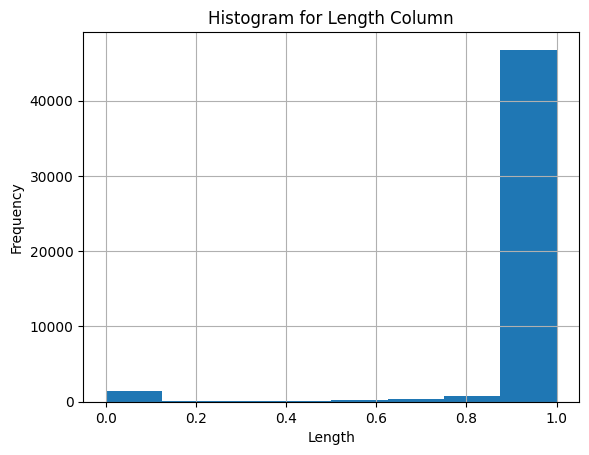

In [43]:
import matplotlib.pyplot as plt
hist = df_mik['pen_score6'].hist(bins=8)

# Adding title and labels
plt.title('Histogram for Length Column')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Display the histogram
plt.show()